<a href="https://colab.research.google.com/github/RutvijP/MachineLearningResources/blob/main/OCRrecognisition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building a Image Classification Pipeline 

In [ ]:
# Importing various libraries and dependencies

import tensorflow as tf
!pip install mitdeeplearning
import mitdeeplearning as mdl

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm   # genearates the progressbar in the notebook

# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
#assert len(tf.config.list_physical_devices('GPU')) > 0


##1.1 MNIST dataset : Hand Written Data Set 

In [ ]:
# 1. Importing and arranging the dataset with its corresponding labels.
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images,axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images =  (np.expand_dims(test_images,axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)


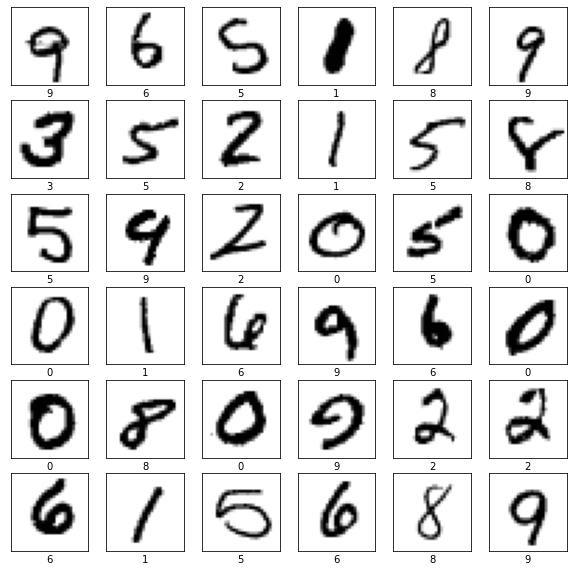

In [ ]:

# 2. Plotting the imported dataset.

plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000 ,36)
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_ind = random_inds[i]
  plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
  plt.xlabel(train_labels[image_ind])
  

In [ ]:
# Neural Network for Handwritten digit Classification
# using the "Keras API" =  open-source deep learning library  for tf, "Sequential Class" =linear model
# flatten to be fed into the model


def build_fc_model():
  fc_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(), # converting 28x28 into a 784 pixels
        tf.keras.layers.Dense(128, activation= tf.nn.relu),
        #building the second layer
         tf.keras.layers.Dense(10, activation= tf.nn.softmax)

  ])
  return fc_model

model = build_fc_model()


### Compile the model

Before training the model, we need to define a few more settings. These are added during the model's [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#compile) step:

* *Loss function* — This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction.
* *Optimizer* — This defines how the model is updated based on the data it sees and its loss function.
* *Metrics* — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the *accuracy*, the fraction of the images that are correctly classified.

We'll start out by using a stochastic gradient descent (SGD) optimizer initialized with a learning rate of 0.1. Since we are performing a categorical classification task, we'll want to use the [cross entropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy).

You'll want to experiment with both the choice of optimizer and learning rate and evaluate how these affect the accuracy of the trained model. 

In [ ]:
# Compiling the model which was assembled before

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64         #Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration
EPOCHS = 5              #iterations

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.5898 - accuracy: 0.8379
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.2161 - accuracy: 0.9386
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1540 - accuracy: 0.9554
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1223 - accuracy: 0.9655
Epoch 5/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1017 - accuracy: 0.9710


In [ ]:
# Evaluating the accuracy of the model 
test_loss , test_acc = model.evaluate(test_images,test_labels)

print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1015 - accuracy: 0.9697
Test Accuracy: 0.9696999788284302
